# Objective
Statistical Analysis of Business Data. Explore the dataset and extract insights from the data. The idea is for us to get comfortable with doing statistical analysis in Python.

We are expected to do the following:
1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]
3. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
4. Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]
5. Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

*Consider a significance level of 0.05 for all tests.

# Context
Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.


# Variables

1. Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
2. Sex - This is the policy holder's gender, either male or female.
3. BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
4. Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
5. Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
6. Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
7. Charges​ - Individual medical costs billed to health insurance

# Scoring guide (Rubric) - Axis Insurance Project
Criteria	Points
1.  Explore the dataset and extract insights using Exploratory Data Analysis.                                            20
2. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?             10
3. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.                10
4. Is the proportion of smokers significantly different across different regions?                                        10
5. Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.                                                                                                                10


Points	                                                                                                                 60

### Importing necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot

In [1]:
####  Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns

### importing warnings.

import warnings
warnings.filterwarnings('ignore')

### Read in the dataset

In [2]:
data = pd.read_csv('AxisInsurance.csv')

 ### copying data to another varaible to avoid any changes to original data

In [3]:
df = data.copy()

### Viewing first few rows of the dataset

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Observations
The data contains seven variables (age, Sex, bmi, Children, Smoker, region and Charges) related to attributes of customers (policy holders) of Axis insurance company. 


### Checking Shape of the data

In [5]:
df.shape

(1338, 7)

#### Observation
There are 1338 rows and 7 column in the data set.
1336 rows represent 1338 cases. 
7 columns represent 7 different variables.

### Checking the dataframe information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Observations
1. All the columns are having equal number of observations indicating no chance of standardized missing values, whereas, for  the unstandarized missing value the data needs to be observed keenly.
2. Sex, Smoker and region should be categorical variable.
3. since the variable children have maximum value of 5 so it is also convrerted to categorical variable.

# Data Preprocessing

### Fixing the datatypes

In [7]:
# categorical variables are converted to type- category to reduce space  the data frame required to store it.
# the diffrent classes of categorical variable shall be represented by different numbersit.
df['sex'] = df.sex.astype('category')
df['smoker'] = df.smoker.astype('category')
df['region'] = df.region.astype('category')
df['children'] = df.children.astype('category')

In [8]:
#Checking the data types again to confirm fixation of categorical variable.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.3 KB


#### it can be seen that all the variables are fixed to appropriate data type.

In [9]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.0,1338,1338,1338.000000
unique,NaN,2,NaN,6.0,2,4,NaN
top,NaN,male,NaN,0.0,no,southeast,NaN
freq,NaN,676,NaN,574.0,1064,364,NaN
mean,39.207025,NaN,30.663397,NaN,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,NaN,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,NaN,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,NaN,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,NaN,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,NaN,NaN,NaN,16639.912515


### Observations

1. There are two Categories for Sex, two for smokers,  6 for children and four for region in the data.
2. An average age of cutomer is found to be 39.20  <ins>+</ins> 14.049 years, the standard deviation (14.049) of this variable seems very high.
3. An average children / dependents covered by the insurance plan for policy holders is 1.09 <ins>+</ins> 1.205.
4. An average Individual medical costs billed to  to health insurance is 13270.42 <ins>+</ins> 12110.011.
5. An average bmi of customer is 30.663 <ins>+</ins> 6.098 which exceed the range of ideal BMI (18.5 to 24.9)and indicates obesity among customers.
6. More than 75% of customers are above the range of ideal bmi indicating obesity among policy holders. At 25% the value of bmi is 26.296 which is still above 18.5 to 24.9.
7. Data for charges has huge spread ranging from 1121.873 to 63770.428.
8. The 75% value of children / dependents covered by the insurance plan for policy holders is 2 children/dependent but the max value seems 5, highlighting the potential problems of outliers. 


### Detection of Missing Values

In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Observation

There are no standardized  missing values in the data.

The CVS file of the data is also observed and it indicates no unstandarized missing value as well.

### Identification of Duplicates

In [11]:
dupes = df.duplicated()
sum(dupes)

1

#### Observations

There exist one duplicate in the record but as per the nature of data and analysis it is not required to be removed.

# Exploratory data Analysis

##  Univariate analysis

### Exploration based on numerical variables

In [12]:
# I am Adding a function that will help me create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='c') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, rug=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(feature.mean(), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(feature.median(), color='black', linestyle='-')# Add median to the histogram
    ax_hist2.axvline(feature.mode()[0], color='b', linestyle='-')# Add mode to the histogram

###                                                     Univariate analysis on age

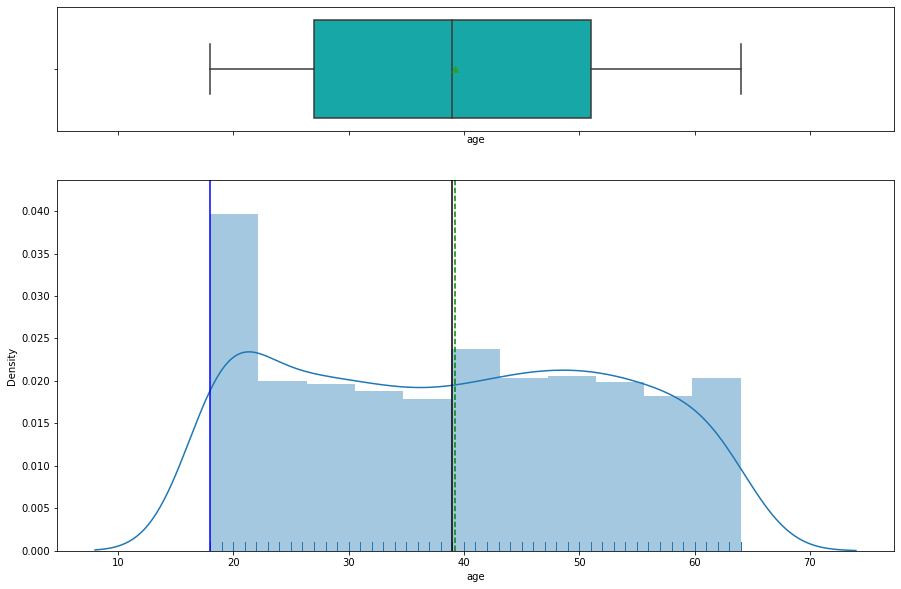

In [13]:
histogram_boxplot(df.age)

In [14]:
df.age.mean()

39.20702541106129

In [15]:
df.age.median()

39.0

In [16]:
df.age.mode()

0    18
dtype: int64

### Summary of Univariate analysis of central tendency and distribution on Variable 'Age'¶
The average customer Age is 39.207 or 39 years.

The most repeated Value of the Age is 18 years indicating more insured of this age group in the data.

The 50% of the data lies between the Age bracket of 18-39 years. (18= minimum value, 39 is the median value).

The distribution of Age variable is relatively flatter distribution or seems like a playtikurtic distribution.

The boxplot does not indicates any outliers and mean (39.20) and median (39.0) are approximately equal but mode(18) is much lesser than the both.

###                                                     Univariate analysis on bmi

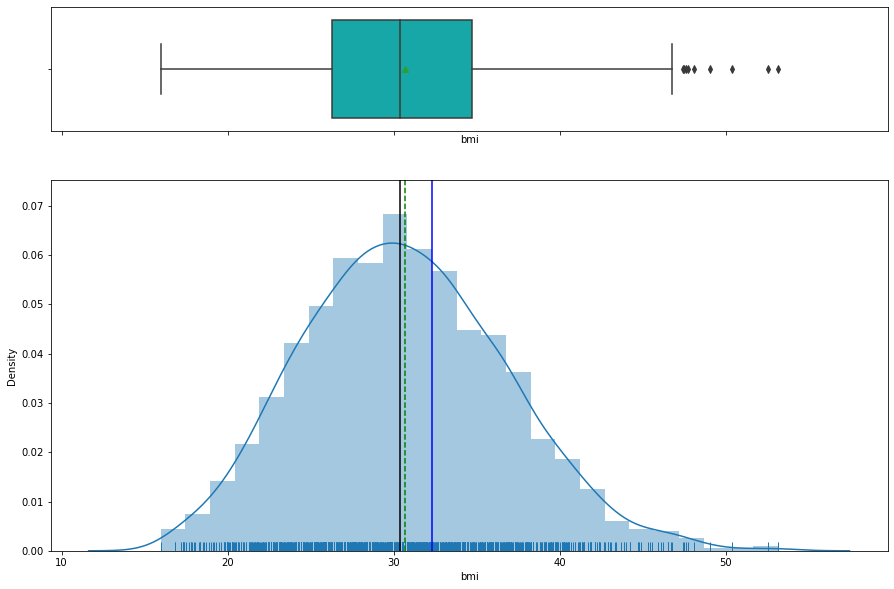

In [19]:
histogram_boxplot(df.bmi)

In [20]:
df.bmi.mean()

30.663396860986538

In [21]:
df.bmi.median()

30.4

In [22]:
df.bmi.mode()

0    32.3
dtype: float64

### Summary of Univariate analysis of central tendency and distribution on Variable bmi
An average bmi of customer is 30.663 + 6.098 which exceed the range of ideal BMI (18.5 to 24.9)and indicates obesity among customers.

The most repeated Value of the bmi is 32.3 indicating more insured belonging to this bmi.

The 50% of the data lies between the bmi bracket of 15.9-30.4. (15.9= minimum value, 30.4 is the median value).

The distribution of bmi variable seems a normal distribution as mean is closer to median and mode.

The boxplot  indicates some outliers towards the right side of the data indicating presence of some extreme obese insured individuals.

###                                                     Univariate analysis on charges

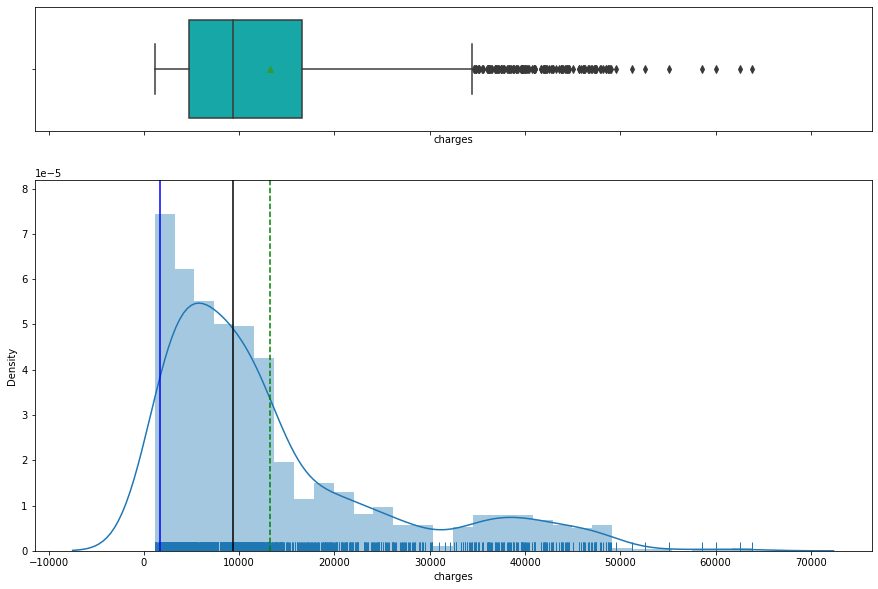

In [25]:
histogram_boxplot(df.charges)

In [26]:
df.charges.mean()

13270.422265141257

In [27]:
df.charges.median()

9382.033

In [28]:
df.charges.mode()

0    1639.5631
dtype: float64

### Summary of Univariate analysis of central tendency and distribution on Variable charges
The Average Individual medical costs billed to health insurance is 13270.42.

The distribution has long right tail indicating a positive skewed distribution with mean>median>mode.

The distribution is full of outliers on the right side of the data in boxplot indicating huge claims of insured idividuals on insurance company.

 Data for charges has huge spread ranging from 1121.873 to 63770.428.


# Exploration based on Categorical variables

Let us explore the categorical variables now. There are four categorical variables in this data namely sex, smoker, children and region.

In [31]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

## Catregorical Distribution of sex

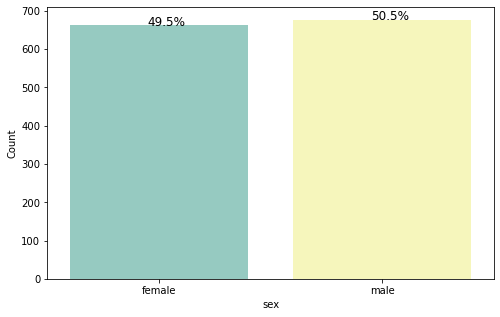

In [32]:
plt.figure(figsize=(8,5))
ax = sns.countplot(df['sex'], palette='Set3')
plt.xlabel('sex')
plt.ylabel('Count')
bar_perc(ax,df['sex'])

In [33]:
my_tab = pd.crosstab(index=df["sex"],  # Make a crosstab
                     columns="count")  # Name the count column
my_tab

col_0,count
sex,
female,662
male,676


#### Observations:
 it can be well observe that the out of 1336 policy holders 100 approximately 676 are males accounting for 50.5%% of the data.
 
662 are female policy holderds accounting for about 49.5% of the data.

## Catregorical Distribution of smoker

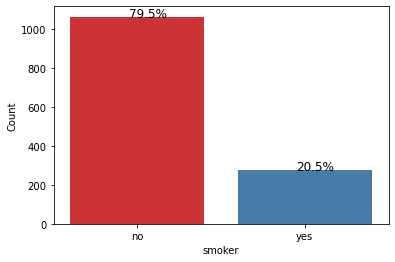

In [34]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df['smoker'], palette='Set1')
plt.xlabel('smoker')
plt.ylabel('Count')
bar_perc(ax,df['smoker'])

In [35]:
my_tab = pd.crosstab(index=df["smoker"],  # Make a crosstab
                     columns="count")  # Name the count column
my_tab

col_0,count
smoker,
no,1064
yes,274


#### Observations:
Out of 1338, 1064 insured does'nt regularly smokes tobacco accounting for79.5% of the data.
 
274 insured individiuals regulary smoke accounting for about 20.5% of the data.

## Catregorical Distribution of children

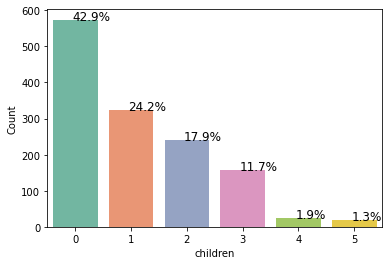

In [36]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df['children'], palette='Set2')
plt.xlabel('children')
plt.ylabel('Count')
bar_perc(ax,df['children'])

In [37]:
my_tab = pd.crosstab(index=df["children"],  # Make a crosstab
                     columns="count")  # Name the count column
my_tab

col_0,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


### Observation

576 insured individuals have 0 children / dependents covered by the insurance plan this accounts for 42.9% of the total data.

Very less number of insured 3, 4 or 5 children/dependent covered by insurance. The data reports as the number of children/dependent increase the percentage of insured  is going down.


## Catregorical Distribution of region

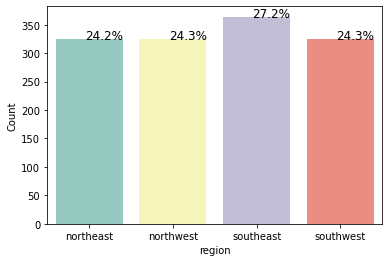

In [38]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df['region'], palette='Set3')
plt.xlabel('region')
plt.ylabel('Count')
bar_perc(ax,df['region'])

In [39]:
my_tab = pd.crosstab(index=df["region"],  # Make a crosstab
                     columns="count")  # Name the count column
my_tab

col_0,count
region,
northeast,324
northwest,325
southeast,364
southwest,325


### Observation

There exist four regions covered in the insurance data.

The highest insured perecntage is reported in Southeast with 27..2% cases belongiing to it.

The southwest, northwest and northeast are having almost same percentage of reported cases covereing approximately 24% of the data each.

# Bivariate Analysis

## Correlations for Quantitative Variables (pearson Product Moment)


<AxesSubplot:>

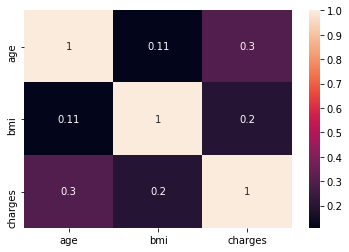

In [40]:
#Heatmap for visual depection of correlation
sns.heatmap(df.corr(), annot=True)

In [41]:
df.corr()

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


### Observation:

1. None of the correlations seems strong.
2. A moderate positive correlation can be seen between age and charges (r= 2.99, approx 3).
3. relationship between age and bmi (r=0.1092) and charges and bmi (r= 0.198) is very low and indicating lack of interdependence.





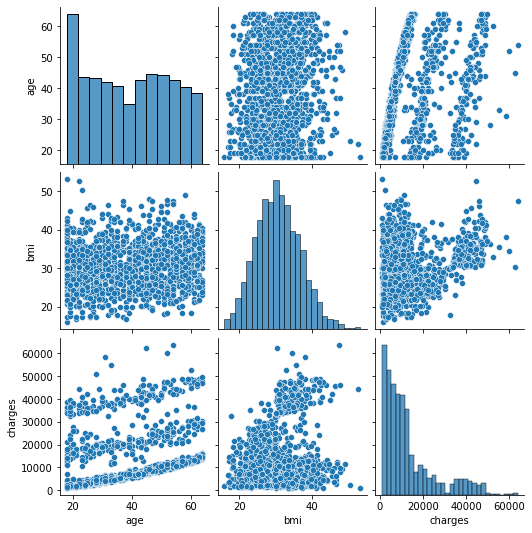

In [42]:
# pairplot for quantitative variables
sns.pairplot(df)

### Observation 

same observations as explained under correlation table.

## Bivariate Analysis with one Categorical and one quantitative variable

## Ages of different sex policy holders

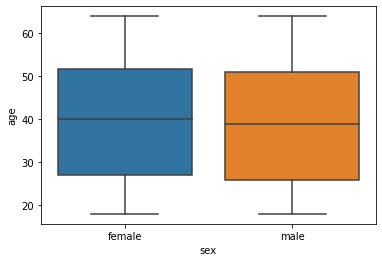

In [43]:
### boxplot
sns.boxplot(data = df,x='sex',y='age');

In [44]:
pd.crosstab(df['sex'],df['age'])

age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
sex,,,,,,,,,,,,,,,,,,,,,
female,33,33,14,13,13,14,14,13,13,14,...,13,13,13,13,13,11,12,12,12,11
male,36,35,15,15,15,14,14,15,15,14,...,13,13,13,12,12,12,11,11,11,11


In [45]:
#using Dataframegroupby attribute to determine average age of different sex policy holders to elaborate the above box plot.

df.groupby('sex', as_index=False).age.mean()

,sex,age
0,female,39.503021
1,male,38.917160


In [46]:
# using Dataframegroupby attribute to determine median age of different sex policy holders to elaborate the above box plot.


df.groupby('sex', as_index=False).age.median()

,sex,age
0,female,40
1,male,39


### Observation

it can be seen from above boxplot that female and male policy holders seems similar in their ages. 

The mean (39.503021) & median (40) Age  of females is slightly above than male mean (38.917160) & median (39) but the difference seems negligable.

##  bmi of different sex policy holders

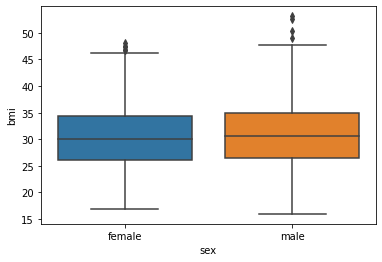

In [47]:
### Bar plot indicating bmi of different sex policy holders
sns.boxplot(data = df,x='sex',y='bmi');

In [48]:
pd.crosstab(df['sex'],df['bmi'])

bmi,15.960,16.815,17.195,17.290,17.385,17.400,17.480,17.670,17.765,17.800,...,46.750,47.410,47.520,47.600,47.740,48.070,49.060,50.380,52.580,53.130
sex,,,,,,,,,,,,,,,,,,,,,
female,0,1,1,2,0,1,0,0,1,1,...,1,1,0,1,0,1,0,0,0,0
male,1,1,0,1,1,0,1,1,0,0,...,0,0,1,0,1,0,1,1,1,1


In [49]:
# using Dataframegroupby attribute to determine average bmi of different sex policy holders to elaborate the above box plot.

df.groupby('sex', as_index=False).bmi.mean()

,sex,bmi
0,female,30.377749
1,male,30.943129


In [50]:
# using Dataframegroupby attribute to determine median bmi of different sex policy holders to elaborate the above box plot.
df.groupby('sex', as_index=False).bmi.median()

,sex,bmi
0,female,30.1075
1,male,30.6875


### Observation: 

The male box plot has more outliers on upper side than female boxplot indicating presence of more obesity in male policy holders, but median of both sex is above ideal bmi range 18.5 to 24.9.

## Insurance claims made by different sex individuals 

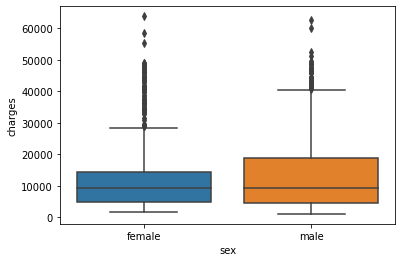

In [51]:
## Bar plot indicating charges of different sex indivudals
sns.boxplot(data = df,x='sex',y='charges');

In [52]:
pd.crosstab(df['sex'],df['charges'])

charges,1121.87390,1131.50660,1135.94070,1136.39940,1137.01100,1137.46970,1141.44510,1146.79660,1149.39590,1163.46270,...,48885.13561,48970.24760,49577.66240,51194.55914,52590.82939,55135.40209,58571.07448,60021.39897,62592.87309,63770.42801
sex,,,,,,,,,,,,,,,,,,,,,
female,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
male,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,1,1,0


In [53]:
# using Dataframegroupby attribute to determine average charges of different sex policy holders to elaborate the above box plot.

df.groupby('sex', as_index=False).charges.mean()

,sex,charges
0,female,12569.578844
1,male,13956.751178


In [54]:
# using Dataframegroupby attribute to determine median charges of different sex policy holders to elaborate the above box plot.

df.groupby('sex', as_index=False).charges.median()

,sex,charges
0,female,9412.96250
1,male,9369.61575


In [55]:
# extention of above analysis by finding Quantiles

df.groupby('sex', as_index=False).charges.quantile([0.25,0.5,0.75])

sex       charges
0 0.25  female   4885.158700
  0.50  female   9412.962500
  0.75  female  14454.691825
1 0.25    male   4619.134000
  0.50    male   9369.615750
  0.75    male  18989.590250

##### Observation (for charges made by different sex individuals)

The male boxplot extends longer than female one indicating a larger spread of charges claimed by males.

The 75th value of the male charges (18989.59) is much greater than the female (14454.691825) indicating the a taller upper whisker of male boxplot.

The female boxplot visually seems to have greater outliers on upperside than males one.

### Insurance claims (charges) made by insured with diferent  Number of children / dependents

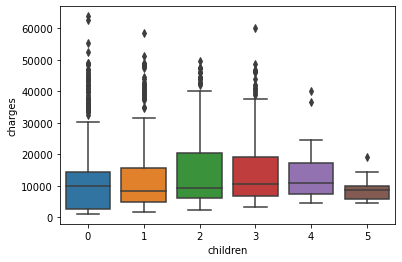

In [56]:
### boxplot
sns.boxplot(data = df,x='children',y='charges');

In [57]:
pd.crosstab(df['children'],df['charges'])

charges,1121.87390,1131.50660,1135.94070,1136.39940,1137.01100,1137.46970,1141.44510,1146.79660,1149.39590,1163.46270,...,48885.13561,48970.24760,49577.66240,51194.55914,52590.82939,55135.40209,58571.07448,60021.39897,62592.87309,63770.42801
children,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# using Dataframegroupby attribute to determine average charges of policy holders having different children/dependents to elaborate the above box plot.

df.groupby('children', as_index=False).charges.mean()

,children,charges
0,0,12365.975602
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311
5,5,8786.035247


In [59]:
# using Dataframegroupby attribute to determine median charges of policy holders having different children/dependents to elaborate the above box plot.

df.groupby('children', as_index=False).charges.median()

,children,charges
0,0,9856.95190
1,1,8483.87015
2,2,9264.97915
3,3,10600.54830
4,4,11033.66170
5,5,8589.56505


#### Observation (Insurance claims (charges) made by different policy holders having different depenedents.

The box plot or statistics calculated above doesnot give a convencing evidence of any realtionship between claims made by policy holders and number of children/dependents they have covered in their insurance.

The highest median value of charges belongs to individuals having 4 children/dependents. wehereeas, the lowest belong to those having one child/dependent covered in their insurance plan.


## age and smoking habits of policy holders

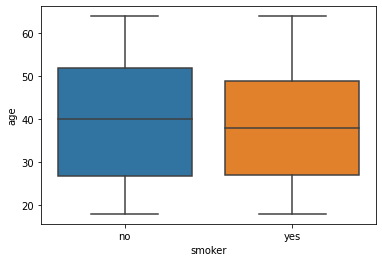

In [60]:
### boxplot
sns.boxplot(data = df,x='smoker',y='age');

In [61]:
pd.crosstab(df['smoker'],df['age'])

age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
smoker,,,,,,,,,,,,,,,,,,,,,
no,57,50,20,26,22,21,22,23,25,19,...,24,22,22,24,21,18,17,19,18,15
yes,12,18,9,2,6,7,6,5,3,9,...,2,4,4,1,4,5,6,4,5,7


In [62]:
#using Dataframegroupby attribute to determine average age of insured with different smoking habits.

df.groupby('smoker', as_index=False).age.mean()

,smoker,age
0,no,39.385338
1,yes,38.514599


In [63]:
# using Dataframegroupby attribute to determine median age f insured with different smoking habits to elaborate the above box plot.


df.groupby('smoker', as_index=False).age.median()

,smoker,age
0,no,40
1,yes,38


In [64]:
# extention of above analysis by finding Quantiles

df.groupby('smoker', as_index=False).age.quantile([0.25,0.5,0.75])

smoker    age
0 0.25     no  26.75
  0.50     no  40.00
  0.75     no  52.00
1 0.25    yes  27.00
  0.50    yes  38.00
  0.75    yes  49.00

### Observation
The average age (38.514) of insured in the data who frequently smoke is approximtely a year less than those who do not (39.385338).

From the boxplot it can be seen that median age of registered insured who frequently smoke is 2 years less then those who do not. 75% of the age data of frequent smokers lies below the age bracket of 49 years. Whereas, for non frequent smokers it extends to 52 years.

no extreme values are found in any of the boxplot.

##  bmi of Insured having different smoking habits

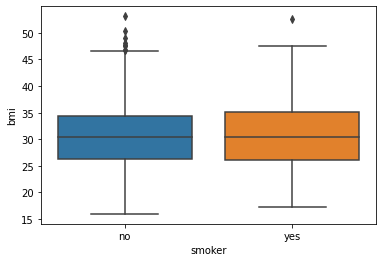

In [65]:
### Bar plot indicating bmi of Insured having different smoking habit
sns.boxplot(data = df,x='smoker',y='bmi');

In [66]:
pd.crosstab(df['smoker'],df['bmi'])

bmi,15.960,16.815,17.195,17.290,17.385,17.400,17.480,17.670,17.765,17.800,...,46.750,47.410,47.520,47.600,47.740,48.070,49.060,50.380,52.580,53.130
smoker,,,,,,,,,,,,,,,,,,,,,
no,1,2,0,2,1,1,1,1,0,1,...,1,0,1,0,1,1,1,1,0,1
yes,0,0,1,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [67]:
# using Dataframegroupby attribute to determine average  bmi of Insured having different smoking habit to elaborate the above box plot.

df.groupby('smoker', as_index=False).bmi.mean()

,smoker,bmi
0,no,30.651795
1,yes,30.708449


In [68]:
# using Dataframegroupby attribute to determine median bmi of  bmi of Insured having different smoking habit to elaborate the above box plot.
df.groupby('smoker', as_index=False).bmi.median()

,smoker,bmi
0,no,30.3525
1,yes,30.4475


In [69]:
# extention of above analysis by finding Quantiles

df.groupby('smoker', as_index=False).bmi.quantile([0.25,0.5,0.75])

smoker       bmi
0 0.25     no  26.31500
  0.50     no  30.35250
  0.75     no  34.43000
1 0.25    yes  26.08375
  0.50    yes  30.44750
  0.75    yes  35.20000

### Observation

The box (the difference between lower and upper quartile) of insured who smoke frequently seems a bit bigger than those who donot as the frequent smokers are found to be a bit more obese than non smokers but the difference is very minute.

More outliers are found in the upper side on box-plot of non frequent smokers. There is only one outliers on the upper side of box-plot of frequent smoker. This may be the reason of mean and median inflated reporting for bmi of non-frequent smokers.

##  charges reported by Insured having different smoking habits

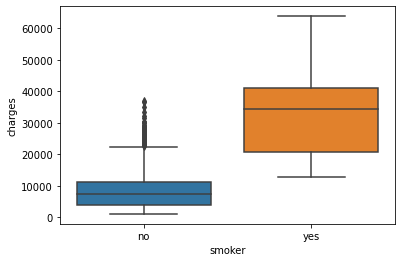

In [70]:
### Bar plot indicating charges reported by Insured having different smoking habits
sns.boxplot(data = df,x='smoker',y='charges');

In [71]:
pd.crosstab(df['smoker'],df['charges'])

charges,1121.87390,1131.50660,1135.94070,1136.39940,1137.01100,1137.46970,1141.44510,1146.79660,1149.39590,1163.46270,...,48885.13561,48970.24760,49577.66240,51194.55914,52590.82939,55135.40209,58571.07448,60021.39897,62592.87309,63770.42801
smoker,,,,,,,,,,,,,,,,,,,,,
no,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
yes,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [72]:
# using Dataframegroupby attribute to determine average  charges reported by Insured having different smoking habits to elaborate the above box plot.

df.groupby('smoker', as_index=False).charges.mean()

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


In [73]:
# using Dataframegroupby attribute to determine median charges reported by Insured having different smoking habitsto elaborate the above box plot.
df.groupby('smoker', as_index=False).charges.median()

,smoker,charges
0,no,7345.40530
1,yes,34456.34845


In [74]:
# extention of above analysis by finding Quantiles

df.groupby('smoker', as_index=False).charges.quantile([0.25,0.5,0.75])

smoker       charges
0 0.25     no   3986.438700
  0.50     no   7345.405300
  0.75     no  11362.887050
1 0.25    yes  20826.244213
  0.50    yes  34456.348450
  0.75    yes  41019.207275

### Observation:
it can be seen that insured that regularly smokes tobacco have much higher medical costs billed to health insurance then those who donot smoke reqularly.
    

## age and children/dependents covered by insured

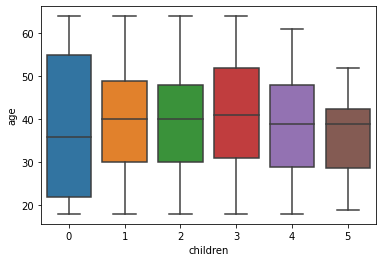

In [75]:
### boxplot
sns.boxplot(data = df, x='children',y='age');

In [76]:
pd.crosstab(df['children'],df['age'])

age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
children,,,,,,,,,,,,,,,,,,,,,
0,51,50,17,16,18,13,23,12,10,14,...,13,16,16,21,10,19,15,16,17,13
1,9,11,6,5,4,6,1,6,9,6,...,5,4,6,2,6,2,3,3,2,3
2,6,5,3,5,2,5,1,4,7,3,...,4,3,3,2,3,0,2,2,1,4
3,2,1,1,1,4,4,2,3,1,5,...,4,2,0,0,6,2,2,2,3,2
4,1,0,0,1,0,0,1,2,1,0,...,0,1,1,0,0,0,1,0,0,0
5,0,1,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#using Dataframegroupby attribute to determine average age of beneficiary with differrent number of children/dependent covered in insurance plan.

df.groupby('children', as_index=False).age.mean()

,children,age
0,0,38.444251
1,1,39.453704
2,2,39.445833
3,3,41.566879
4,4,39.000000
5,5,35.611111


In [78]:
# extention of above analysis by finding Quantiles

df.groupby('children', as_index=False).age.quantile([0.25,0.5,0.75])

children    age
0 0.25        0  22.00
  0.50        0  36.00
  0.75        0  55.00
1 0.25        1  30.00
  0.50        1  40.00
  0.75        1  49.00
2 0.25        2  30.00
  0.50        2  40.00
  0.75        2  48.00
3 0.25        3  31.00
  0.50        3  41.00
  0.75        3  52.00
4 0.25        4  29.00
  0.50        4  39.00
  0.75        4  48.00
5 0.25        5  28.75
  0.50        5  39.00
  0.75        5  42.50

### Observation
The highest spread is reported in the Age variable with respect to 0 number of children/dependents.

The lowest average age is reported for insured having 5 children.


## age and beneficiary's place of residence in the U.S

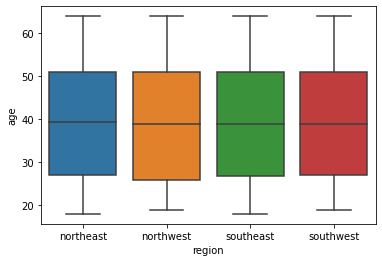

In [79]:
### boxplot
sns.boxplot(data = df,x='region',y='age');

In [80]:
pd.crosstab(df['region'],df['age'])

age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
region,,,,,,,,,,,,,,,,,,,,,
northeast,32,0,6,7,7,7,7,7,7,7,...,6,7,7,6,6,6,6,6,5,4
northwest,0,34,7,7,7,7,7,7,7,6,...,6,6,7,7,5,5,6,6,6,5
southeast,37,3,8,7,8,7,7,7,7,9,...,7,6,6,6,8,6,5,6,6,8
southwest,0,31,8,7,6,7,7,7,7,6,...,7,7,6,6,6,6,6,5,6,5


In [81]:
#using Dataframegroupby attribute to determine average age of beneficiary with different place of residence.

df.groupby('region', as_index=False).age.mean()

,region,age
0,northeast,39.268519
1,northwest,39.196923
2,southeast,38.939560
3,southwest,39.455385


In [82]:
# using Dataframegroupby attribute to determine median age of beneficiary with different place of residence. to elaborate the above box plot.


df.groupby('region', as_index=False).age.median()

,region,age
0,northeast,39.5
1,northwest,39.0
2,southeast,39.0
3,southwest,39.0


In [83]:
# extention of above analysis by finding Quantiles

df.groupby('region', as_index=False).age.quantile([0.25,0.5,0.75])

region    age
0 0.25  northeast  27.00
  0.50  northeast  39.50
  0.75  northeast  51.00
1 0.25  northwest  26.00
  0.50  northwest  39.00
  0.75  northwest  51.00
2 0.25  southeast  26.75
  0.50  southeast  39.00
  0.75  southeast  51.00
3 0.25  southwest  27.00
  0.50  southwest  39.00
  0.75  southwest  51.00

### Observation
There exist not much difference found in the box plots when beneficaiaries ages are inspected with respect to their region of residence except that insured at the age of 18 years are found in northeast and southeast but not in northwest and southwest.

## bmi and beneficiary's place of residence in the U.S

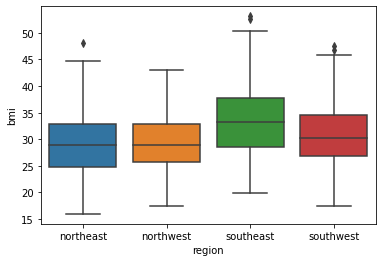

In [84]:
### boxplot
sns.boxplot(data = df,x='region',y='bmi');

In [85]:
pd.crosstab(df['region'],df['bmi'])

bmi,15.960,16.815,17.195,17.290,17.385,17.400,17.480,17.670,17.765,17.800,...,46.750,47.410,47.520,47.600,47.740,48.070,49.060,50.380,52.580,53.130
region,,,,,,,,,,,,,,,,,,,,,
northeast,1,2,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
northwest,0,0,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
southeast,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,1,1,1,1
southwest,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [86]:
#using Dataframegroupby attribute to determine average bmi of beneficiary with different place of residence.

df.groupby('region', as_index=False).bmi.mean()

,region,bmi
0,northeast,29.173503
1,northwest,29.199785
2,southeast,33.355989
3,southwest,30.596615


In [87]:
# using Dataframegroupby attribute to determine median bmi of beneficiary with different place of residence. to elaborate the above box plot.


df.groupby('region', as_index=False).bmi.median()

,region,bmi
0,northeast,28.88
1,northwest,28.88
2,southeast,33.33
3,southwest,30.30


In [88]:
# extention of above analysis by finding Quantiles

df.groupby('region', as_index=False).bmi.quantile([0.25,0.5,0.75])

region       bmi
0 0.25  northeast  24.86625
  0.50  northeast  28.88000
  0.75  northeast  32.89375
1 0.25  northwest  25.74500
  0.50  northwest  28.88000
  0.75  northwest  32.77500
2 0.25  southeast  28.57250
  0.50  southeast  33.33000
  0.75  southeast  37.81250
3 0.25  southwest  26.90000
  0.50  southwest  30.30000
  0.75  southwest  34.60000

### Observation

it can be well observed that policy holders belonging to northeast and 	northwest meets have an average bmi that falls under ideal bmi range.

The most obseity is found in southeast followed by southwest regions as can be seen from box-plot.

## charges and beneficiary's place of residence in the U.S

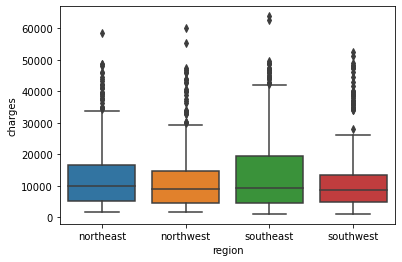

In [89]:
### boxplot
sns.boxplot(data = df,x='region',y='charges');

In [90]:
pd.crosstab(df['region'],df['charges'])

charges,1121.87390,1131.50660,1135.94070,1136.39940,1137.01100,1137.46970,1141.44510,1146.79660,1149.39590,1163.46270,...,48885.13561,48970.24760,49577.66240,51194.55914,52590.82939,55135.40209,58571.07448,60021.39897,62592.87309,63770.42801
region,,,,,,,,,,,,,,,,,,,,,
northeast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
northwest,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
southeast,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,1,1
southwest,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [91]:
#using Dataframegroupby attribute to determine average charges of beneficiary with different place of residence.

df.groupby('region', as_index=False).charges.mean()

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


In [92]:
# using Dataframegroupby attribute to determine median charges of beneficiary with different place of residence. to elaborate the above box plot.


df.groupby('region', as_index=False).charges.median()

,region,charges
0,northeast,10057.652025
1,northwest,8965.795750
2,southeast,9294.131950
3,southwest,8798.593000


In [93]:
# extention of above analysis by finding Quantiles

df.groupby('region', as_index=False).charges.quantile([0.25,0.5,0.75])

region       charges
0 0.25  northeast   5194.322288
  0.50  northeast  10057.652025
  0.75  northeast  16687.364100
1 0.25  northwest   4719.736550
  0.50  northwest   8965.795750
  0.75  northwest  14711.743800
2 0.25  southeast   4440.886200
  0.50  southeast   9294.131950
  0.75  southeast  19526.286900
3 0.25  southwest   4751.070000
  0.50  southwest   8798.593000
  0.75  southwest  13462.520000

### Observation

with the box-plots and statistics calculated above it can be seen that most charges are claimed by policy holders of southeast region. This might be due their higher bmi as compared to other region.

## Bivariate analysis with two categorical variable

### Sex and Number of Children

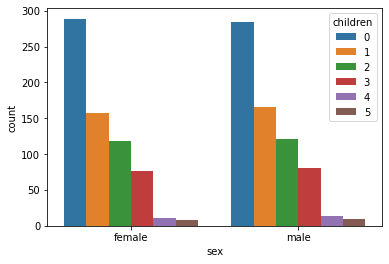

In [94]:
# count plot with two categorical variables

sns.countplot(df['sex'], hue=df['children']);

In [95]:
pd.crosstab(df['children'],df['sex'], margins= True)

sex,female,male,All
children,,,
0,289,285,574
1,158,166,324
2,119,121,240
3,77,80,157
4,11,14,25
5,8,10,18
All,662,676,1338


### Observation:

not much variation is found in terms of how many children/dependents covered by male or female.

### Sex and Smoking habits

<AxesSubplot:xlabel='smoker', ylabel='count'>

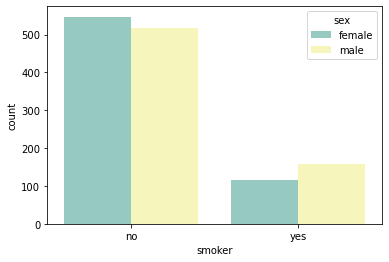

In [96]:
# count plot with two categorical variables

sns.countplot(df['smoker'], hue=df['sex'], palette='Set3')

In [97]:
pd.crosstab(df['sex'],df['smoker'], margins= True)

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


### Observation:

it can be seen that females smoke tobacco less frequently then males.

### Sex and region of residence of insured

<AxesSubplot:xlabel='region', ylabel='count'>

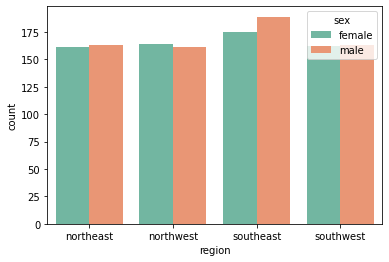

In [98]:
# count plot with two categorical variables

sns.countplot(df['region'], hue=df['sex'], palette='Set2')

In [99]:
pd.crosstab(df['sex'],df['region'], margins= True)

region,northeast,northwest,southeast,southwest,All
sex,,,,,
female,161,164,175,162,662
male,163,161,189,163,676
All,324,325,364,325,1338


### Observation:

Compared to others the southeast region reports more insured male than females though the female percentage is also high.

### number of chidren/dependents and Smoking habits

<AxesSubplot:xlabel='smoker', ylabel='count'>

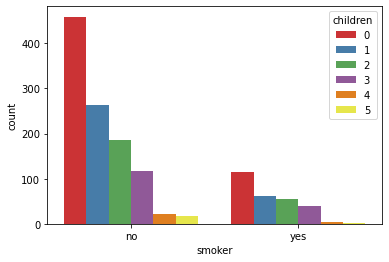

In [100]:
# count plot with two categorical variables

sns.countplot(df['smoker'], hue=df['children'], palette='Set1')

In [101]:
pd.crosstab(df['children'],df['smoker'], margins= True)

smoker,no,yes,All
children,,,
0,459,115,574
1,263,61,324
2,185,55,240
3,118,39,157
4,22,3,25
5,17,1,18
All,1064,274,1338


### Observation:

The data doesnot highlight any relationship between the smoking habits and number of chidren/dependent registered with policy holders.

### children/dependents and region of residence of insured

<AxesSubplot:xlabel='region', ylabel='count'>

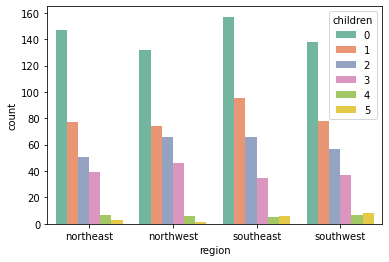

In [102]:
# count plot with two categorical variables

sns.countplot(df['region'], hue=df['children'], palette='Set2')

In [103]:
pd.crosstab(df['children'],df['region'], margins= True)

region,northeast,northwest,southeast,southwest,All
children,,,,,
0,147,132,157,138,574
1,77,74,95,78,324
2,51,66,66,57,240
3,39,46,35,37,157
4,7,6,5,7,25
5,3,1,6,8,18
All,324,325,364,325,1338


### Observation:

The data doesnot highlight any significant relationship between number of children/dependent registered in different regions of united states.

### Smoking Habits in different regions 

<AxesSubplot:xlabel='smoker', ylabel='count'>

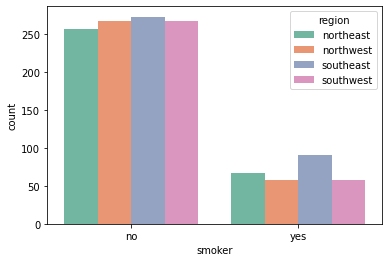

In [104]:
# count plot with two categorical variables

sns.countplot(df['smoker'], hue=df['region'], palette='Set2')

In [105]:
pd.crosstab(df['smoker'],df['region'], normalize= True, margins= True)

region,northeast,northwest,southeast,southwest,All
smoker,,,,,
no,0.192078,0.199552,0.204036,0.199552,0.795217
yes,0.050075,0.043348,0.068012,0.043348,0.204783
All,0.242152,0.242900,0.272048,0.242900,1.000000


### Observation:
compared to other region the insured regularly or non regularly smoking tobacco are in higher Percentage in southeast, though this percentage seems compariably high for regular smokers in southeast then non regular smokers in southeast.

# Multivariate Analysis

#### Cross Tabulation For analysing  categorical Variable (Sex, smoker & Children/dependents)

In [106]:
pd.crosstab(df.children, [df.smoker, df.sex], margins = True)

smoker       no         yes        All
sex      female male female male      
children                              
0           236  223     53   62   574
1           133  130     25   36   324
2            97   88     22   33   240
3            63   55     14   25   157
4            11   11      0    3    25
5             7   10      1    0    18
All         547  517    115  159  1338

#### observation: 

not noticible trend is found except that male and female non regular smokers have compartively high number of children and dependent covered.

#### Cross Tabulation For analysing categorical Variable (Sex, smoker & region)

In [107]:
pd.crosstab(df.region, [df.smoker, df.sex], margins = True)

smoker        no         yes        All
sex       female male female male      
region                                 
northeast    132  125     29   38   324
northwest    135  132     29   29   325
southeast    139  134     36   55   364
southwest    141  126     21   37   325
All          547  517    115  159  1338

#### Observation: 

no significant trend is found.

#### Cross Tabulation For analysing all categorical Variable (Sex, region & Children/dependents)

In [244]:
pd.crosstab(df.region, [df.smoker, df.children], margins = True)

smoker      no                         yes                     All
children     0    1    2    3   4   5    0   1   2   3  4  5      
region                                                            
northeast  121   55   42   29   7   3   26  22   9  10  0  0   324
northwest  108   65   55   33   5   1   24   9  11  13  1  0   325
southeast  117   73   48   24   5   6   40  22  18  11  0  0   364
southwest  113   70   40   32   5   7   25   8  17   5  2  1   325
All        459  263  185  118  22  17  115  61  55  39  3  1  1338

#### Observation:

The regular smokers are found to have less children is three region

# other graphical Analysis

### Relationship between age and bmi moderated by sex

<AxesSubplot:xlabel='age', ylabel='bmi'>

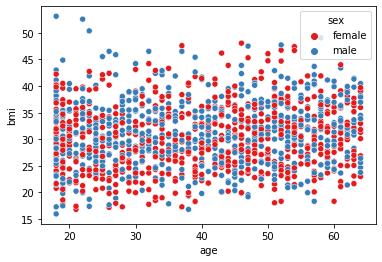

In [109]:
sns.scatterplot(df['age'], df['bmi'], hue=df['sex'], palette='Set1') 

### Observation
There exist no pattern in the graph for said variables

### Relationship between age and charges moderated by sex

<AxesSubplot:xlabel='age', ylabel='charges'>

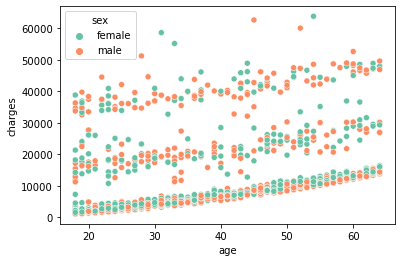

In [110]:
sns.scatterplot(df['age'], df['charges'], hue=df['sex'], palette='Set2') 

### Observation

There seems a moderate positive correlation between age and charges but gender is not moderating this relationship.

### Relationship between charges and bmi moderated by sex

<AxesSubplot:xlabel='charges', ylabel='bmi'>

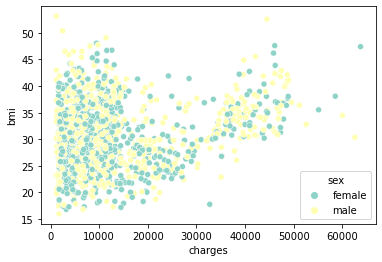

In [111]:
sns.scatterplot(df['charges'], df['bmi'], hue=df['sex'], palette='Set3') 

### Observation
The relationship is not moderated by sex

### Relationship between age and bmi moderated by children/dependents

<AxesSubplot:xlabel='age', ylabel='bmi'>

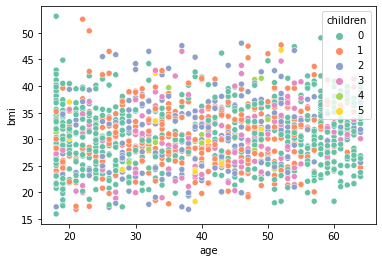

In [112]:
sns.scatterplot(df['age'], df['bmi'], hue=df['children'], palette='Set2') 

### Observation
There exist no pattern in the graph for said variables except that insured with 5 children/dependent covered are not seen on higher side age variable

### Relationship between age and charges moderated by children

<AxesSubplot:xlabel='age', ylabel='charges'>

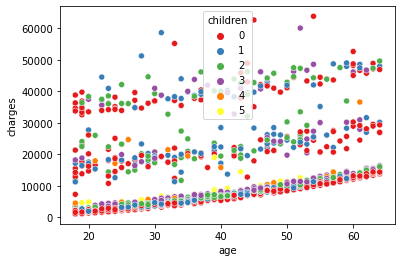

In [113]:
sns.scatterplot(df['age'], df['charges'], hue=df['children'], palette='Set1') 

### Observation

There seems a moderate positive correlation between age and charges. 

The policy holders with 5 dependent/children covered are found to have low charges and medium age. whereas, the charges also seems to be low for those having 4 dependents irrespective of age.


### Relationship between charges and bmi moderated by children/dependent covered by insured

<AxesSubplot:xlabel='charges', ylabel='bmi'>

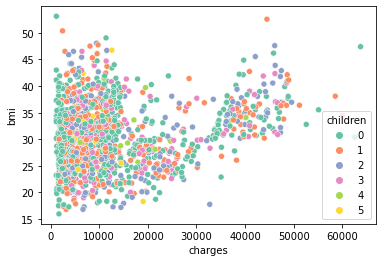

In [114]:
sns.scatterplot(df['charges'], df['bmi'], hue=df['children'], palette='Set2') 

### Observation
The relationship is not moderated by no of children/dependents covered by insured.

### Relationship between age and bmi moderated by smoking habits

<AxesSubplot:xlabel='age', ylabel='bmi'>

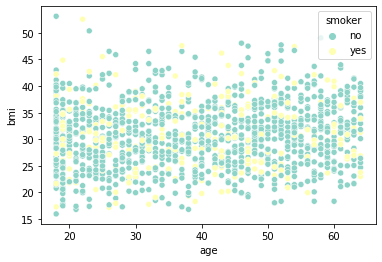

In [115]:
sns.scatterplot(df['age'], df['bmi'], hue=df['smoker'], palette='Set3') 

### Observation
There exist no pattern in the graph for said variables.

### Relationship between age and charges moderated by smoking habits

<AxesSubplot:xlabel='age', ylabel='charges'>

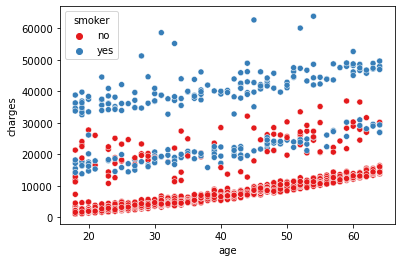

In [116]:
sns.scatterplot(df['age'], df['charges'], hue=df['smoker'], palette='Set1') 

### Observation

it can be seen that Frequent smokers of tobacco are the one's claiming higher charges irrespective of their age.


### Relationship between charges and bmi moderated by moderated by smoking habits

<AxesSubplot:xlabel='bmi', ylabel='charges'>

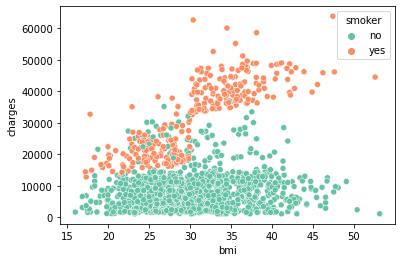

In [117]:
sns.scatterplot(df['bmi'], df['charges'], hue=df['smoker'], palette='Set2') 

### Observation

it can be seen that Frequent smokers of tobacco are the one's claims higher charges irrespective of their bmi.


### Relationship between age and bmi moderated by region of residence

<AxesSubplot:xlabel='age', ylabel='bmi'>

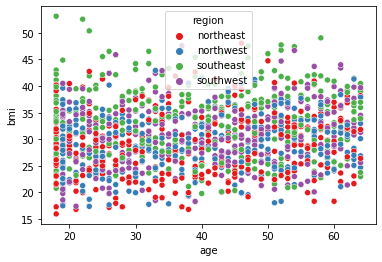

In [118]:
sns.scatterplot(df['age'], df['bmi'], hue=df['region'], palette='Set1') 

### Observation
There exist no pattern in the graph for said variables.

### Relationship between age and charges moderated by region of residence

<AxesSubplot:xlabel='age', ylabel='charges'>

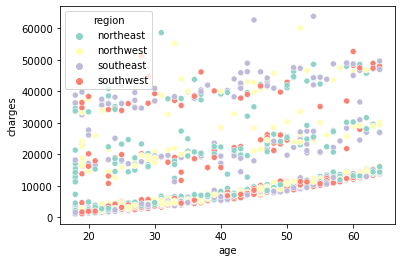

In [119]:
sns.scatterplot(df['age'], df['charges'], hue=df['region'], palette='Set3') 

### Observation

area of residence does not moderate this relationship


### Relationship between charges and bmi moderated region of residence

<AxesSubplot:xlabel='bmi', ylabel='charges'>

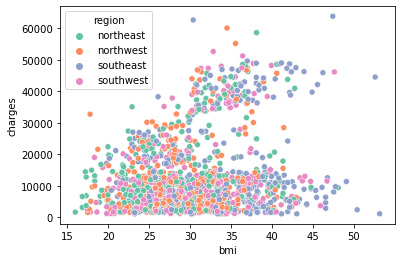

In [120]:
sns.scatterplot(df['bmi'], df['charges'], hue=df['region'], palette='Set2') 

### Observation

region of residence doesnot moderate this relationship.

# SUMMARY OF EXPLORATORY DATA ANALYSIS

1. There are 1338 rows and 7 column in the data set. 1336 rows represent 1338 cases. 7 columns represent 7 different variables.

2. There are two Categories for Sex, two for smokers,  6 for children and four for region in the data.

3. An average age of cutomer is found to be 39.20  <ins>+</ins> 14.049 years, the standard deviation (14.049) of this variable seems very high.

4. An average children / dependents covered by the insurance plan for policy holders is 1.09 <ins>+</ins> 1.205.

5. An average Individual medical costs billed to health insurance is 13270.42 <ins>+</ins> 12110.011.

6. An average bmi of customer is 30.663 <ins>+</ins> 6.098 which exceed the range of ideal BMI (18.5 to 24.9)and indicates obesity among customers.

7. More than 75% of customers are above the range of ideal bmi indicating obesity among policy holders. At 25% the value of bmi is 26.296 which is still above 18.5 to 24.9.

8. Data for charges has huge spread ranging from 1121.873 to 63770.428. The distribution is full of outliers on the right side of the data indicating huge claims of some insured idividuals on insurance company.

9. There exist more insured (79.5%) eho smoke tobacco regularly then those who dont (20.5%).

10. The highest insured percentage is reported in Southeast (27.2%). The southwest, northwest and northeast are having almost same percentage of reported cases approximately 24% each.

11. With the increase in child/dependent the number of insured Cases is decreasing. The highest percentage is for insured with 0 children/dependent (42.9%) whereas lowest percentage is for insured with 4 (1.9%) and 5 (1.3%) children/dependents respectively.

12. A moderate positive correlation can be seen between age and charges (r= 2.99, approx 3). Relationship between age and bmi (r=0.1092) and charges and bmi (r= 0.198) is very low and indicating lack of interdependence.

13. Median of both sex bmi is above ideal bmi range 18.5 to 24.9 indicating obseity among both.

14. The male boxplot extends longer than female one indicating a larger spread of charges claimed by males. The 75th value of the male charges (18989.59) is much greater than the female (14454.691825) proving evudent of larger claims by men.

15. The highest median value of charges belongs to individuals having 4 children/dependents. whereas, the lowest belong to those having one child/dependent covered in their insurance plan these findings needs to accessed in detail for appropriate policy recommendation.

16. Median age of registered insured who frequently smoke is 2 years less then those who do not this findings also need consideration.

17. frequent smokers are found to be a bit more obese than non smokers but the difference is very minute.

18. insured that regularly smokes tobacco have much higher medical costs billed to health insurance then those who do not smoke reqularly.

19. The highest spread is reported in the Age variable with respect to 0 number of children/dependents. The lowest average age variable spread is reported for insured having 5 children, this finding also needs to elaborated.

20.  Not much difference  when beneficaiaries ages are inspected with respect to their region of residence except that insured at the age of 18 years are found in northeast and southeast but not in northwest and southwest.

21. policy holders belonging to northeast and northwest meets have an average bmi that falls under ideal bmi range.The most obseity is found in southeast followed by southwest regions.

22. Most charges are claimed by policy holders of southeast region. This might be due their higher bmi as compared to other region 

23. not much variation is found in terms of how many children/dependents covered by male or female

24. females smoke tobacco less frequently then males.

25. Compared to others the southeast region reports more insured male than females though the female percentage is also high.

26. Compared to other region the insured regularly or non regularly smoking tobacco are in higher Percentage in southeast, though this percentage seems comparably high for regular smokers in southeast then non regular smokers in southeast.

27. male and female non regular smokers have comparatively high number of children and dependent covered then regular smokers.

28. The policy holders with 5 dependent/children covered are found to have low charges and medium age. whereas, the charges also seems to be low for those having 4 dependents irrespective of age.





# Statistical Analysis 

### key question 2:
Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? 

### Descrpitive Statistics

In [121]:
# using Dataframegroupby attribute to determine average  charges reported by Insured having different smoking habits to elaborate the analysis.
df.groupby('smoker', as_index=False).charges.mean()

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


Observation

it can be seen that mean charges of individuals that frequently smoke tobacco (8434.26) is far greater than those who dont (32050.23). 
 

#### Graphical Analysis 

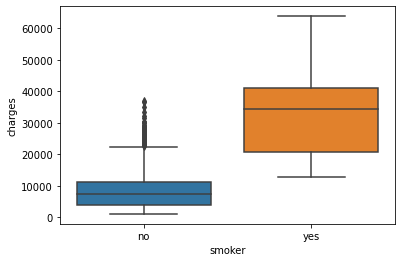

In [122]:
### Bar plot indicating charges reported by Insured having different smoking habits
sns.boxplot(data = df,x='smoker',y='charges');

Text(0, 0.5, 'charges')

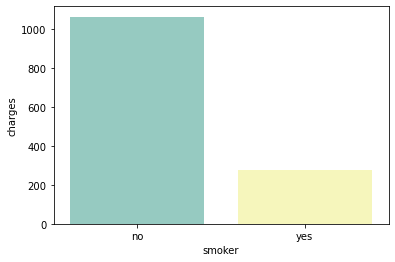

In [123]:
# bar chart
plt.figure(figsize=(6,4))
ax = sns.countplot(df['smoker'], palette='Set3')
plt.xlabel('smoker')
plt.ylabel('charges')

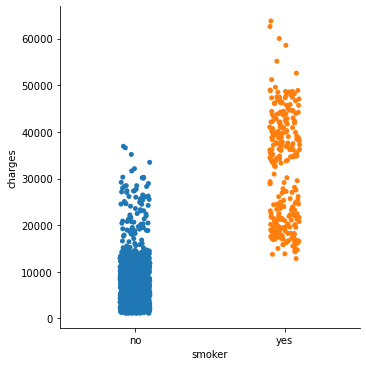

In [124]:
sns.catplot(x="smoker", y="charges", data=df)

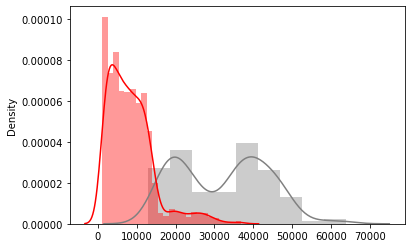

In [134]:
reg_smoker_charges = df[df.smoker == 'yes']
reg_smoker_charges = reg_smoker_charges[['charges']]

nonreg_smoker_charges = df[df.smoker == 'no']
nonreg_smoker_charges = nonreg_smoker_charges[['charges']]

sns.distplot(reg_smoker_charges,color="grey")
sns.distplot(nonreg_smoker_charges,color="red")
plt.show()

#### observation: (graphical Analysis)

The graphical analysis signifies that insured who regularly smokes tobacco have greater medical claims than those who dont smoke regularly.


 #### Defining null and alternate hypotheses¶
Null hypothesis = "Mean charges of regular smokers is less than or equal to non-regular smokers"



Alternative hypothesis = "Mean charges of regular smokers is greater than non-regular smokers."

#### Decision on level of significance 

 significance level of 0.05 for all tests in this assigment is predermined.


#### Identification of the test statistic¶

since it is mean comparison of two-independent group so it independent sample-t-test shall be applied. As the sample size is considereably large so it is assumed that  t approaches z.

#### Assumptions of independent-sample t-test.
1. Assumption #1: The dependent variable should be measured on a continuous scale (i.e., it is measured at the interval or ratio level). 

This condition is satisfied as charges variable is a continous variable.
2. Assumption #2: our independent variable should consist of two categorical, independent groups. 

This condition is satisfied as we have two groups


3. Assumption #3: we should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves. For example, there must be different participants in each 4. group with no participant being in more than one group. 

it is also satisfied as regular and nonregular smokers are part of seperate group 

4. Assumption 4: our dependent variable should be approximately normally distributed for each group of the independent variable

5. Assumption 5: There needs to be homogeneity of variances.

#### testing assumption 4:
shapiro Wilk test is applied to derive assumptions

our dependent variable should be approximately normally distributed for each group of the independent variable we created group of two dependent variables. one group estimates charges for insured those smoke frequently and the next group is for insured who donot frequently smoke.

In [195]:
from scipy import stats

shapiro_test1 = stats.shapiro(reg_smoker_charges)
shapiro_test1

ShapiroResult(statistic=0.9395521879196167, pvalue=3.6251879276250065e-09)

In [196]:
shapiro_test2 = stats.shapiro(nonreg_smoker_charges)
shapiro_test2

ShapiroResult(statistic=0.8728628158569336, pvalue=1.4455900162299346e-28)

##### Conclusion for result of Assumption 4:
since the p<0.05 for both variables so the dependent variable is not normally distributed for each group of the independent variable so this assumption is violated.

    

#### Testing for assumption 5:

There needs to be homogeneity of variances.    
    

In [201]:
mynom=df['smoker']
myscale=df['charges']

In [157]:
# now we create bolean (true and falsefor each smoker

nonregsmoker1 = mynom == 'no'
regsmoker2 = mynom == 'yes'

In [158]:
nonregsmokercharges1=myscale[nonregsmoker1].dropna()
regsmokercharges2=myscale[regsmoker2].dropna()

In [155]:
from scipy.stats import levene

In [168]:
levene(nonregsmokercharges1, regsmokercharges2, center = 'mean')

LeveneResult(statistic=403.26397655339804, pvalue=1.3484459247996362e-78)

##### Conclusion for result of Assumption 5:
since F= 403.26, p<0.05 therefore we reject the assumptions of equality of variance.

#### Calculate the p - value and test statistics
since independent sample assumptions are not fullfilled therefore we apply a non-parametric alternative Mannwhitney u test.

In [174]:
from scipy.stats import ttest_1samp, ttest_ind
# 
# a.k.a Mann Whitney U - Used when samples are not normally distributed
stats.mannwhitneyu(nonregsmokercharges1, regsmokercharges2)


MannwhitneyuResult(statistic=7403.0, pvalue=2.6351167222517853e-130)

In [176]:
#The following is the pvalue for a one-tailed test.
p_value= 2.6351167222517853e-130
(p_value/2)

1.3175583611258927e-130

 ### Decision to reject or not to reject the null hypothesis

From the data, it can be concluded that "Mean charges of regular smokers is greater than non-regular smokers(U =7403.0 , p< 0.05). this makes us reject the null hypothesis and retain the alternative hypothesis.


as per some statisticain independent sample t test can also be applied but major credible author suggest non paramaetric alternative in such situation.

In [ ]:
################################################################################

### Key Question no 3:
Prove (or disprove) with statistical evidence that the BMI of females is different from that of males?

### Descrpitive Statistics

In [180]:
# using Dataframegroupby attribute to determine average bmi of different sex policy holders to elaborate the analysis.

df.groupby('sex', as_index=False).bmi.mean()

,sex,bmi
0,female,30.377749
1,male,30.943129


Observation

The mean doesnot indicate much difference among both genders BMI. 
 

#### Graphical Analysis 

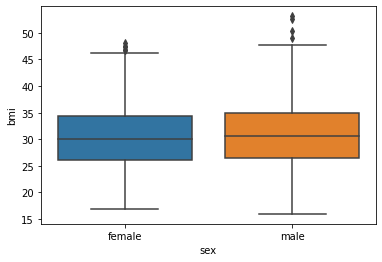

In [179]:
### Bar plot indicating bmi of different sex policy holders
sns.boxplot(data = df,x='sex',y='bmi');

Text(0, 0.5, 'bmi')

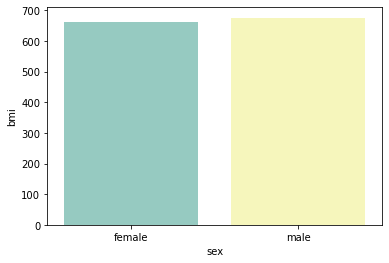

In [181]:
# bar chart
plt.figure(figsize=(6,4))
ax = sns.countplot(df['sex'], palette='Set3')
plt.xlabel('sex')
plt.ylabel('bmi')

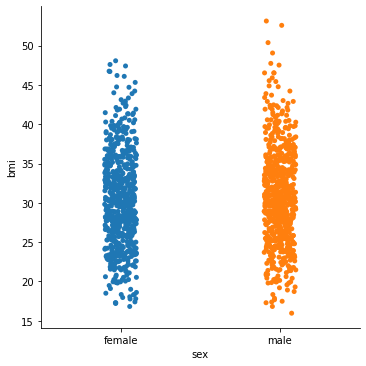

In [182]:
sns.catplot(x="sex", y="bmi", data=df)

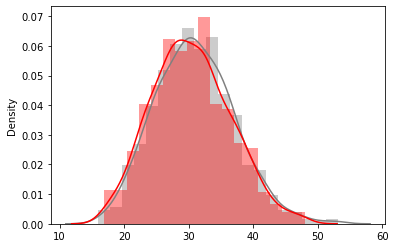

In [189]:
malebmi= df[df.sex == 'male']
malebmi= malebmi[['bmi']]

femalebmi= df[df.sex == 'female']
femalebmi= femalebmi [['bmi']]

sns.distplot ( malebmi, color="grey")
sns.distplot( femalebmi, color="red")
plt.show()


#### observation: (graphical Analysis)

The graphical analysis signifies that both male and females doesnot show much difference in their bmi.


 #### Defining null and alternate hypotheses¶
Null hypothesis = "there is no sttitically significant difference in male and female bmi" or "male bmi is equal to female bmi"



Alternative hypothesis ="there is a staitically significant difference in male and female bmi" or "male bmi is not  equal to female bmi"


this is a two tail test.

#### Decisiion on level of significance 

 significance level of 0.05 for all tests in this assigment is predermined.


#### Identification of the test statistic¶

since it is mean comparison of two-independent group so it independent sample-t-test shall be applied. As the sample size is considereably large so it is assumed that  t approaches z.

#### Assumptions of independent-sample t-test.
1. Assumption #1: The dependent variable should be measured on a continuous scale (i.e., it is measured at the interval or ratio level). 

This condition is satisfied as bmi variable is a continous variable.

2. Assumption #2: we independent variable should consist of two categorical, independent groups. 

This condition is satisfied as we have two groups of sex, male and female.

3. Assumption #3: we should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves. For example, there must be different participants in each 4. group with no participant being in more than one group. 

it is also satisfied as male and female are part of seperate group 

4. Assumption #4: our dependent variable should be approximately normally distributed for each group of the independent variable (tested below)

5. Assumption #5: There needs to be homogeneity of variances. (tested below)

#### testing assumpting 4
shapiro Wilk test is applied to derive assumptions

our dependent variable should be approximately normally distributed for each group of the independent variable we created group of two dependent variables. one group estimates bmi for male and the next group female.

In [190]:
from scipy import stats

shapiro_test3 = stats.shapiro(malebmi)
shapiro_test3

ShapiroResult(statistic=0.9930475354194641, pvalue=0.003130641533061862)

In [191]:
shapiro_test2 = stats.shapiro(femalebmi)
shapiro_test2

ShapiroResult(statistic=0.9930257797241211, pvalue=0.0035433683078736067)

##### Conclusion for result of Assumption 4
since the p<0.05 for both variables so the dependent variable is not normally distributed for each group of the independent variable so this assumption is violated.

    

#### Testing for assumption 5:

There needs to be homogeneity of variances.    
    

In [192]:
mynom1=df['sex']
myscale1=df['bmi']

In [197]:
# now we create bolean (true and falsefor each smoker

female1 = mynom1 == 'female'
male1 = mynom1 == 'male'

In [199]:
femalebmi = myscale1[female1].dropna()
malebmi = myscale1[male1].dropna()

In [155]:
from scipy.stats import levene

In [200]:
levene(malebmi, femalebmi, center = 'mean')

LeveneResult(statistic=0.0030411494335658316, pvalue=0.9560299025144636)

##### Conclusion for result of Assumption 5:
since F= 0.003, p>0.05 therefore we retain the assumptions of equality of variance.

#### Calculate the p - value and test statistics
The only assumption of normality is not fullfiled but since the variances are equal and sample size is large therefore we will apply independent sample t test.

In [202]:
from scipy.stats import ttest_1samp, ttest_ind
t_statistic, p_value = ttest_ind(malebmi, femalebmi)
print(t_statistic, p_value)

1.696752635752224 0.08997637178984932


 ### Decision to reject or not to reject the null hypothesis

From the data, it can be concluded that their no statistically significant difference in male and female bmi t(1.697), p>0.05, mean difference = .565379. thus this makes us retain our null hypothesis and reject the alternative hypothesis.


In [ ]:
########################################################################################################################

### Key question 4:
Is the proportion of smokers significantly different across different regions?

### Descrpitive Statistics

### Smoking Habits in different regions 

In [222]:
pd.crosstab(df['smoker'],df['region'], margins= True)

region,northeast,northwest,southeast,southwest,All
smoker,,,,,
no,257,267,273,267,1064
yes,67,58,91,58,274
All,324,325,364,325,1338


#### observation

the frequencies of regular & non regular smokers of tobacco across different regions of US can be seen in the above table.

### Graphical Analysis

<AxesSubplot:xlabel='smoker', ylabel='count'>

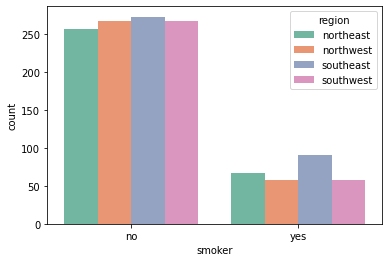

In [104]:
# count plot with two categorical variables

sns.countplot(df['smoker'], hue=df['region'], palette='Set2')

#### observation:
compared to other region the insured regularly or non regularly smoking tobacco are in higher Percentage in southeast, though this percentage seems compariably high for regular smokers in southeast then non regular smokers in southeast.

#### Hypotheses:

Null hypothesis: "The proportion of smokers is significantly equal across regions"

    
Alternative hypothesis: "proportion of smokers is significantly different across different regions"

#### Identification of the test statistic¶

Chisquare test of independence is applied as the suugested hint points out

#### Assumptions for test:

1. Assumption #1: our two variables should be measured at an ordinal or nominal level (i.e., categorical data). 


this condition is satisfied as both variables (smoker and region) are nominal


2. Assumption #2: our two variable should consist of two or more categorical, independent groups. 

this condition is also satisfied as smoker (yes, no) & region (southeast, southwest, northeast and northwest) have independent categories.

#### Decisiion on level of significance 

 significance level of 0.05 for all tests in this assigment is predermined.


#### Calculate the p - value and test statistics


In [223]:
# First way of doing it:

stats.chi2_contingency([[257, 267, 273, 267], [67, 58, 91, 58]])
# the arrays taken from contingency table

(7.34347776140707,
 0.06171954839170547,
 3,
 array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
        [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]]))

In [238]:
# An aliternative way of doing it is as:

crosstab = pd.crosstab(df['region'],df['smoker'])  # Contingency table of region and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print('At 5 %s level of significance, the p-value is %1.7f' %('%', p_value))

At 5 % level of significance, the p-value is 0.0617195


 #### Decision to reject or not to reject the null hypothesis

In [ ]:
#We can see here that χ2 = 7.43, p =>0.05. Thus we retain our null hypothesis that proportion of smokers is significantly equal across regions.

In [ ]:
##########################################################################################################################

### Key question 5:
Is the mean BMI of women with no children, one child, and two children the same?

Explain your answer with statistical evidence

#### Creation of data set for analysis

In [225]:
filtered_df = df[(df.sex == 'female') & ((df.children == 0) | (df.children == 1) | (df.children == 2))]
filtered_df = filtered_df[['sex', 'bmi', 'children']]
filtered_df


,sex,bmi,children
0,female,27.90,0
5,female,25.74,0
6,female,33.44,1
9,female,25.84,0
11,female,26.29,0
...,...,...,...
1331,female,33.40,0
1334,female,31.92,0
1335,female,36.85,0
1336,female,25.80,0


#### Descriptive Statistics

In [228]:
#using Dataframegroupby attribute to determine average bmi of females o, 1 and 2 children.

filtered_df.groupby('children', as_index=False).bmi.mean()

,children,bmi
0,0,30.361522
1,1,30.052658
2,2,30.649790
3,3,NaN
4,4,NaN
5,5,NaN


### Observation
it can be seen the mean of women bmi seems closer to each other with o, 1 and 2 children.

### Graphical Analysis:

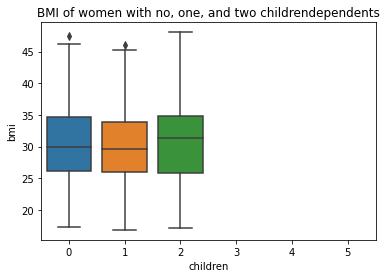

In [233]:
### boxplot
sns.boxplot(data = filtered_df,x='children',y='bmi');
plt.title('BMI of women with no, one, and two childrendependents')
plt.show()

#### observation:
 the median bmi of women with two children/dependents is higher than the rest, its spread is also more. 

### Hypothesis:

Null hypothesis: "mean BMI of women with no children, one child, and two children are same"
    
    
Alternative hypothesis: "mean BMI of women with no children, one child, and two children are different" or "atleast one mean is different"

#### identification of test Statistics:

One way anova shall be applied as:

1. dependent variable of women bmi is measured at the interval or ratio level (i.e., it is continuous)

2. independent variable children (o,1 &2) consists of more than two, independent groups. 


#### Calculate the p - value and test statistics


In [236]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
formula = 'bmi ~ C(children)'
model = ols(formula, filtered_df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq    mean_sq         F    PR(>F)
C(children)    5.0    151.314093  30.262819  0.823263  0.533371
Residual     563.0  20695.661583  36.759612       NaN       NaN


In [242]:
### Alternative way
female_df = df[df['sex'] == 'female']

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']



f_stat, p_value = stats.f_oneway(zero,one,two)
print(aov_table)

                df        sum_sq    mean_sq         F    PR(>F)
C(children)    5.0    151.314093  30.262819  0.823263  0.533371
Residual     563.0  20695.661583  36.759612       NaN       NaN


#### Step 5:  Decide to reject or accept null hypothesis

since the sig value of one way anova is graeter than 0.05 therefore we retain the null hypothesis that mean BMI of women with no children, one child, and two children are same.

In [ ]:
##########################################################################################################################

### policy recommendation:

The insurance company should collect more data on various customer dynamics such as income, race etc so that more detail insights shall be generated.

The company should decide on more elaborated marketing techniques for the insurance customers with specific target to obesity as majority of the customers are above ideal BMI range.

The Company should introduce packages to attract customers having greater dependents since the company lacks customers with greater number of dependents. This should be one of the venue for companies earning.

Regional insurance sales should be focus and specific cultural and demographic factors should be considered for it.

The percentage of non-regular smokers is very less, it should be considered by company and reach with different touch points.

Youth or relatively young people should also be considered as a niche market. Small insurance palns should be introduced for them as insured at the age of 18 years are found in northeast and southeast but not in northwest and southwest

Southeast region should be analyzed as what has led to more sales in this region thus other regions can be focused according.


### Further analysis:
The highest spread is reported in the Age variable with respect to 0 number of children/dependents. The lowest average age variable spread is reported for insured having 5 children, this and various other findings also needs to elaborated.


The methodological choices for data collection needs to be changed and a mix method approach should be adopted. More detail Qualitative interviews shall be conducted for increasing customers and satisfying existing customers.


More sophisticated Explanatory data analysis techniques should be applied like Multinomial Logistic regression keeping different product as Dependent variable and the given other attributes as independent variables to come up with sound findings.

Cluster analysis and Multidimensional Scaling can be another explanatory technique to appear on sound findings.

